In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
df_accounts = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\accounts.csv',delimiter=";",low_memory=False)
df_opp = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\opportunities.csv',delimiter=";",low_memory=False)
df_fx = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\fx.csv',delimiter=";",low_memory=False)
df_products = pd.read_csv(r'C:\Users\1026664\OneDrive - JDA Software Inc\Documents\Talent Platoons - Machine Learning\products.csv',delimiter=";",low_memory=False)

In [4]:
df_accounts_bkp = df_accounts.copy()
df_opp_bkp = df_opp.copy()
df_fx_bkp = df_fx.copy()
df_products_bkp = df_products.copy()

In [5]:
df_opp_bkp['SnapshotGenDate'] = pd.to_datetime(df_opp_bkp['SnapshotGenDate'])
df_opp_bkp['created_date'] = pd.to_datetime(df_opp_bkp['created_date'])
df_opp_bkp['close_date'] = pd.to_datetime(df_opp_bkp['close_date'])

In [6]:
df_accounts_bkp['SnapshotGenDate'] = pd.to_datetime(df_accounts_bkp['SnapshotGenDate'])

1. Cleaning data

In [7]:
opportunities = df_opp_bkp[df_opp_bkp['stage'].isin(['Open', 'Acknowledged', 
                                                                 'Suspect', 'Potential', 
                                                                 'Probable'])]['opportunity_id'].unique()
cut = (df_opp_bkp['created_date']>=df_opp_bkp['SnapshotGenDate']-pd.DateOffset(years=3))
cut &= (df_opp_bkp['created_date']<=df_opp_bkp['SnapshotGenDate'])
cut &= (df_opp_bkp['close_date']>=df_opp_bkp['SnapshotGenDate']-pd.DateOffset(years=1))
cut &= (df_opp_bkp['close_date']<=df_opp_bkp['SnapshotGenDate']+pd.DateOffset(years=2))
cut &= (df_opp_bkp['type_group'].isin(['Software', 'Subscription']))
cut &= (df_opp_bkp['opportunity_id'].isin(opportunities))
cut &= (df_opp_bkp['SnapshotGenDate']<'2022-03-31')
cut &= (df_opp_bkp['close_date']<=df_opp['SnapshotGenDate'].max())
df_opp_bkp = df_opp_bkp[cut]

In [8]:
#this cell does not appear to change the number of rows in df_opp_bkp
df_opp_bkp.sort_values(['opportunity_id','SnapshotGenDate', 'today'],inplace=True)
df_opp_bkp.drop_duplicates(subset=['opportunity_id','SnapshotGenDate'], keep='last',inplace=True)

In [9]:
df_accounts_bkp.sort_values(['account_id','SnapshotGenDate', 'today'],inplace=True)
df_accounts_bkp.drop_duplicates(subset=['account_id','SnapshotGenDate'], keep='last',inplace=True)

In [10]:
df_products_bkp.drop_duplicates(subset=['Product_ID__c'], keep='last',inplace=True)

In [11]:
df_opp_bkp.drop(['Unnamed: 0','business_unit','engagement_type','attachment_type','type','won_loss_competitor',
               'close_date_month','fiscal_quarter','fiscal_year','sales_committed_opportunity',
               'oppty_exec_sponsor','Type_Group__c','request_rfp_assistance','today', 'date_to_assigned', 'days_to_assigned'],axis=1,inplace=True)

In [12]:
df_accounts_bkp.drop(['Unnamed: 0','market_segment','customer_market_segment','account_executive_sponsor',
                  'outstanding_AR_balance_30days','credit_status','do_not_contact','customer_payment_terms',
                  'last_sn_case_createddate','engaged_people','num_of_emails','engagement_minutes__3_mo__', 'etldate'],axis=1,inplace=True)

In [13]:
df_products_bkp.drop(['Visible_on_Portal__c','Third_Party_Product__c','SBQQ__QuantityEditable__c','SBQQ__IncludeInMaintenance__c','SBQQ__HasConfigurationAttributes__c','SBQQ__CostEditable__c','Renewable__c','Not_Individually_Sellable__c','NPI_for_OKR__c','Modification_Support_Available__c','Machine_Learning__c','Luminate__c','LastModifiedById','Is_SaaS_Bundle__c','Is_Not_Maintenance_Sales_Item__c','IsActive','Inherit_Sales_Item_from_Parent__c','IPP_Eligible__c','IPP_EligibleF__c','Hide_in_SF_CPQ_Catalog_License__c','Hide_From_CPQ_Catalog_Support_Services__c','Hide_From_CPQ_Catalog_Software__c','Hide_From_CPQ_Catalog_Subscription__c','ETL_CreatedYear','Do_Not_Apply_SSWM_Factor__c','Deferred_Revenue__c','CreatedById','CanUseRevenueSchedule','Available_in_SF_CPQ__c','Apttus_Config2__Icon__c','Apttus_Config2__HasOptions__c','Support_Eligible__c','SBQQ__Taxable__c',
                  'SBQQ__ReconfigurationDisabled__c','SBQQ__PricingMethodEditable__c',
                  'SBQQ__PriceEditable__c','Apttus_Config2__ExcludeFromSitemap__c',
       'Apttus_Config2__HasSearchAttributes__c',
       'Apttus_Config2__ShowTabView__c', 'Bundle__c', 'Can_run_on_Cloud__c',
       'CurrencyIsoCode', 'ETLDate', 'ETLtimestamp',
       'Has_option_price_floor__c', 'Hide_in_SF_CPQ_Catalog_Subscription__c',
       'IsArchived', 'IsDeleted', 'Is_Platinum_Points_Updated__c',
       'Metrics_Required__c', 'NPI__c', 'Native_SaaS__c', 'SBQQ__Component__c',
       'SBQQ__CustomConfigurationRequired__c', 'SBQQ__DescriptionLocked__c',
       'SBQQ__EnableLargeConfiguration__c', 'SBQQ__ExcludeFromMaintenance__c',
       'SBQQ__ExcludeFromOpportunity__c', 'SBQQ__ExternallyConfigurable__c',
       'SBQQ__HasConsumptionSchedule__c', 'SBQQ__Hidden__c',
       'SBQQ__HidePriceInSearchResults__c', 'SBQQ__NewQuoteGroup__c',
       'SBQQ__NonDiscountable__c', 'SBQQ__NonPartnerDiscountable__c',
       'SBQQ__Optional__c','Apttus_Config2__HasDefaults__c'],axis=1,inplace=True)

In [14]:
df_opp_bkp['future_stage'] = df_opp_bkp.groupby('opportunity_id')['stage'].shift(-1)
df_opp_bkp['future_close_date'] = df_opp_bkp.groupby('opportunity_id')['close_date'].shift(-1)

In [15]:
df_merged = pd.merge(df_opp_bkp, df_accounts_bkp, on=['account_id','SnapshotGenDate'], how='left')

2. Creating target

In [16]:
target = df_merged['future_stage']=='Won'
df_merged['target']= target.astype(int)
print(df_merged['target'])

0        0
1        0
2        0
3        0
4        0
        ..
35336    0
35337    0
35338    0
35339    0
35340    0
Name: target, Length: 35341, dtype: int32


In [17]:
df_merged.drop('future_stage',axis=1,inplace=True)

In [18]:
#adding this appears to cause a large drop in purity?
df_merged.drop(df_merged[df_merged['stage'].isin(['Won','Loss','No Decision','Abandoned'])].index,inplace=True)

3. Creating datetime delta features

In [19]:
#previously dropped 'date_to_assigned' because it appears to have around 0.99 correlation with 'date_to_acknowledged'
df_merged['date_to_acknowledged'] = pd.to_datetime(df_merged['date_to_acknowledged'])
df_merged['date_to_probable'] = pd.to_datetime(df_merged['date_to_probable'])
df_merged['date_to_suspect'] = pd.to_datetime(df_merged['date_to_suspect'])
df_merged['last_activity'] = pd.to_datetime(df_merged['last_activity'])
df_merged['etldate'] = pd.to_datetime(df_merged['etldate'])

In [20]:
df_merged['days_acknowledged_to_suspect']=(df_merged['date_to_suspect']-df_merged['date_to_acknowledged']).dt.days
df_merged['days_open_to_probable']=(df_merged['date_to_probable']-df_merged['created_date']).dt.days
df_merged['days_acknowledged_to_probable']=(df_merged['date_to_probable']-df_merged['date_to_acknowledged']).dt.days
# scenarios:
# opportunity not won yet/lost - input roughly infinity
# opportunity skips stages - input delta between last stage and current stage

In [21]:
df_merged['days_open_to_close']=(df_merged['created_date']-df_merged['close_date']).dt.days
df_merged['days_open_to_lastactivity']=(df_merged['created_date']-df_merged['last_activity']).dt.days
df_merged['days_open_to_etl']=(df_merged['created_date']-df_merged['etldate']).dt.days
df_merged['days_open_to_futureclose']=(df_merged['created_date']-df_merged['future_close_date']).dt.days
df_merged['days_open_to_SGD']=(df_merged['created_date']-df_merged['SnapshotGenDate']).dt.days

In [22]:
df_merged.drop(['SnapshotGenDate','date_to_acknowledged','date_to_probable','date_to_suspect', 'theater_country', 'customer_industry', 'customer_tier_level', 'account_credit_limit', 'customer_since_date', 'today', 'ced_status', 'last_face_to_face_meeting', 'sales_growth', 'ad_clicks', 'LastModifiedDate_y', 'LastModifiedDate_x', 'peopleai__TotalTimeSpent__c', 'Primary_Master_Product_Code__c', 'Primary_Master_Product__c', 'mkto_sales_insight', 'highest_contact_level', 'sub_industry', 'opportunity_readiness_scorecard', 'agreement_status', 'opportunity_industry', 'other_competitor', 'theater', 'date_approved_for_full_pursuit_next_step', 'additional_license', 'close_date', 'last_activity', 'etldate', 'future_close_date', 'created_date'],axis=1,inplace=True)

In [23]:
df_merged.drop(['account_id','opportunity_id'],axis=1,inplace=True)

In [24]:
df_merged['fiscal_period'] = df_merged['fiscal_period'].str[5:]

In [25]:
df_merged['fiscal_period']= df_merged['fiscal_period'].astype(int)
df_merged['CHS_Score']= df_merged['CHS_Score'].str.split('(').str[1].str.split('%').str[0].astype(float)

4. Imputating null values

In [26]:
# perhaps before this cell, can create column to count the number of null cells for each row
# imputing null values because feature importance algorithm appears to not accept null values
# perhaps also want to combine some categories
# perhaps some columns can use null as separate category?
# perhaps some numerical columns need other imputation than mean?
#df_merged['amount__converted'].fillna(value=df_merged['amount__converted'].mean(),inplace=True)
df_merged['amount__converted'].fillna(value=df_merged['amount__converted'].mean(),inplace=True)
df_merged['days_to_acknowledged'].fillna(value=df_merged['days_to_acknowledged'].mean(),inplace=True)
df_merged['deal_size_band__in__usd'].fillna(value='1_<125K',inplace=True)
df_merged['opportunity_category'].fillna(value='Other',inplace=True)
df_merged['stage'].fillna(value='Open',inplace=True)
df_merged['primary_industry'].fillna(value='Manufacturing',inplace=True)
df_merged['amount_at_suspect__converted'].fillna(value=df_merged['amount_at_suspect__converted'].mean(),inplace=True)
df_merged['days_open_to_suspect'].fillna(value=df_merged['days_open_to_suspect'].mean(),inplace=True)
df_merged['days_suspect_to_probable'].fillna(value=df_merged['days_suspect_to_probable'].mean(),inplace=True)
df_merged['Aggregate_PEB_Value__c'].fillna(value=df_merged['Aggregate_PEB_Value__c'].mean(),inplace=True)
df_merged['primary_industry'].fillna(value='Potential Azure',inplace=True)
df_merged['CHS_Score'].fillna(value=df_merged['CHS_Score'].mean(),inplace=True)
df_merged['account_type'].fillna(value='Client',inplace=True)
df_merged['days_since_last_case'].fillna(value=df_merged['days_since_last_case'].mean(),inplace=True)
df_merged['days_since_BY_customer'].fillna(value=df_merged['days_since_BY_customer'].mean(),inplace=True)
df_merged['outstanding_AR_Balance'].fillna(value=df_merged['outstanding_AR_Balance'].mean(),inplace=True)
df_merged['website_visits'].fillna(value=df_merged['website_visits'].mean(),inplace=True)
df_merged['visited_website_in_last_30days'].fillna(value='maybe',inplace=True)
df_merged['DnB_credit_limit'].fillna(value=df_merged['DnB_credit_limit'].mean(),inplace=True)
df_merged['outstanding_ar_balance_amount'].fillna(value=df_merged['outstanding_ar_balance_amount'].mean(),inplace=True)
df_merged['outstanding_AR_Balance_over_30days'].fillna(value=df_merged['outstanding_AR_Balance_over_30days'].mean(),inplace=True)
df_merged['days_acknowledged_to_suspect'].fillna(value=df_merged['days_acknowledged_to_suspect'].mean(),inplace=True)
df_merged['days_open_to_probable'].fillna(value=df_merged['days_open_to_probable'].mean(),inplace=True)
df_merged['days_acknowledged_to_probable'].fillna(value=df_merged['days_acknowledged_to_probable'].mean(),inplace=True)
df_merged['days_open_to_futureclose'].fillna(value=df_merged['days_open_to_futureclose'].mean(),inplace=True)

In [27]:
df_merged.shape

(24009, 39)

In [28]:
df_merged.dtypes

amount__converted                     float64
days_to_acknowledged                  float64
deal_size_band__in__usd                object
account_rating                          int64
lead_source                            object
type_group                             object
opportunity_category                   object
opportunity_sub_category               object
stage                                  object
fiscal_period                           int32
age                                   float64
primary_industry                       object
amount_at_suspect__converted          float64
days_open_to_suspect                  float64
days_suspect_to_probable              float64
Aggregate_PEB_Value__c                float64
subscription_mode                      object
product_lines                         float64
Probability                           float64
CurrencyIsoCode                        object
CHS_Score                             float64
account_type                      

5. Encoding categorical features

In [29]:
from sklearn.preprocessing import LabelEncoder

df_merged[['deal_size_band__in__usd','lead_source','type_group','opportunity_category','opportunity_sub_category','stage','primary_industry','subscription_mode','CurrencyIsoCode','account_type','visited_website_in_last_30days']] = df_merged[['deal_size_band__in__usd','lead_source','type_group','opportunity_category','opportunity_sub_category','stage','primary_industry','subscription_mode','CurrencyIsoCode','account_type','visited_website_in_last_30days']].apply(LabelEncoder().fit_transform)

In [30]:
df_merged['deal_size_band__in__usd']

0        3
5        0
6        0
10       1
11       1
        ..
35330    0
35334    0
35335    1
35336    1
35337    1
Name: deal_size_band__in__usd, Length: 24009, dtype: int32

In [31]:
df_merged['amount__converted'].isnull().values.any()

False

6. Use feature selection algorithm

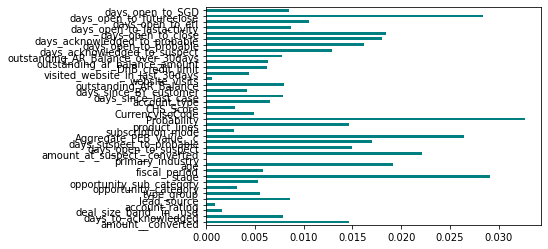

In [32]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(df_merged.loc[:, df_merged.columns!='target'],df_merged['target'])
feat_importances = pd.Series(importances, df_merged.columns[~df_merged.columns.isin(['target'])])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

7. KNN algorithm

In [35]:
from sklearn.neighbors import KNeighborsClassifier

filter_features = feat_importances[feat_importances>0.005].index.tolist()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df_merged[filter_features][:20000], df_merged['target'][:20000])

KNeighborsClassifier(n_neighbors=3)

In [36]:
neigh.score(df_merged[filter_features][20000:], df_merged['target'][20000:])

0.9735594911449239

In [37]:
from sklearn.metrics import precision_score
predictions = neigh.predict(df_merged[filter_features][20000:])
precision_score(df_merged['target'][20000:],predictions)

0.15789473684210525

8. Other calculation

In [38]:
target_ones = predictions[np.argwhere(np.array(df_merged['target'][20000:]).flatten()==1).flatten()]

In [39]:
len(np.argwhere(target_ones==0))

74

In [40]:
len(np.argwhere(predictions==0))

3971

9. Decision Tree Algorithm

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filter_features = feat_importances[feat_importances>0.005].index.tolist()
clf = DecisionTreeClassifier(random_state=0)
print(cross_val_score(clf, df_merged[filter_features], df_merged['target'], cv=10))
clf.fit(df_merged[filter_features][:20000], df_merged['target'][:20000])
print(clf.score(df_merged[filter_features][20000:], df_merged['target'][20000:]))

[0.94169096 0.95501874 0.9633486  0.92628072 0.95960017 0.94835485
 0.95585173 0.70553936 0.94668888 0.95625   ]
0.9700673484659517


In [42]:
predictionsdt = clf.predict(df_merged[filter_features][20000:])
precision_score(df_merged['target'][20000:],predictionsdt)

0.2916666666666667

In [ ]:
#possibilities
#1. Issue in feature engineering
#2. Issue in ML algorithm used
#3. Data distribution issue.
#4. No possibility for good result
#5. slowly increase number of features and observe accuracy rate.
#6. output should be probability format for graphing results?